# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

Productivity Prediction of Garment Employees: Analysis by James Stratton

Data obtained from: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

Goal:
Predict the actual productivity of garment employees based of the features in the dataset.  

Variable Information

01	date		        	:	Date in MM-DD-YYYY
02	day		          	    :	Day of the Week
03	quarter		    	    :	A portion of the month. A month was divided into four quarters
04	department	    	    :	Associated department with the instance
05	team_no		    	    :	Associated team number with the instance
06	no_of_workers		    :	Number of workers in each team
07	no_of_style_change	    :	Number of changes in the style of a particular product
08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
09	smv         			:	Standard Minute Value, it is the allocated time for a task
10	wip			            :	Work in progress. Includes the number of unfinished items for products
11	over_time	        	:	Represents the amount of overtime by each team in minutes
12	incentive	        	:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13	idle_time	        	:	The amount of time when the production was interrupted due to several reasons
14	idle_men	        	:	The number of workers who were idle due to production interruption
15	actual_productivity 	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.



In [2]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRFRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Reading in the CSV file
df = pd.read_csv('garments_worker_productivity.csv')

# Formatted to show all rows of data
pd.set_option('display.max_rows', None)  


# Verify types
df.dtypes


# Analyze data set
df.describe()


# Changed all column headers to snake_case
df.columns = df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()


# Viewed Null values
df.isnull().sum()

# Removing column -> unnamed:_15
df = df.drop(columns= 'unnamed:_15')

# Verified column removed
df.head()

# Replacing Nulls with Zeros, as the only Zeros showing are in wip (work in progress) Will not effect data analysis
df = df.fillna(0)

# Verified column removed
df.head()

# Removing object columns -> date, quarter, department, day
df = df.drop(columns= ['date', 'quarter', 'department', 'day'])

# Verified columns removed
df.head()

# Data is cleaned and ready for Machine Learning Processing
# Target Variable == Targeted Productivity






,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


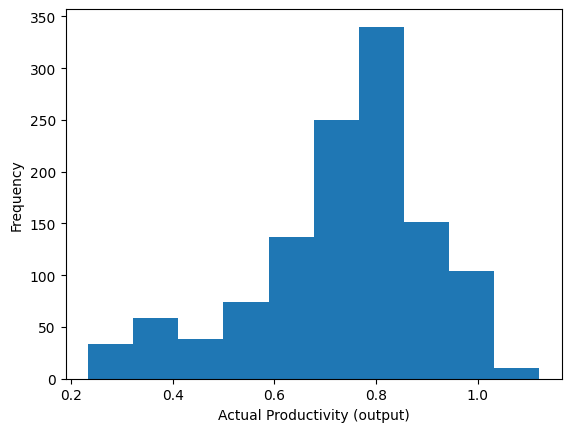

In [4]:
# Using a histogram of our target variable targeted_productivity
# plt.hist('targeted_productivity', data=df);
# plt.xlabel('Productiy (output)');
# plt.ylabel('Frequency');

# Switching target variable to actual_productivity
plt.hist('actual_productivity', data=df);
plt.xlabel('Actual Productivity (output)');
plt.ylabel('Frequency');

Text(0.5, 1.0, 'Actual Productivity Correlation:')

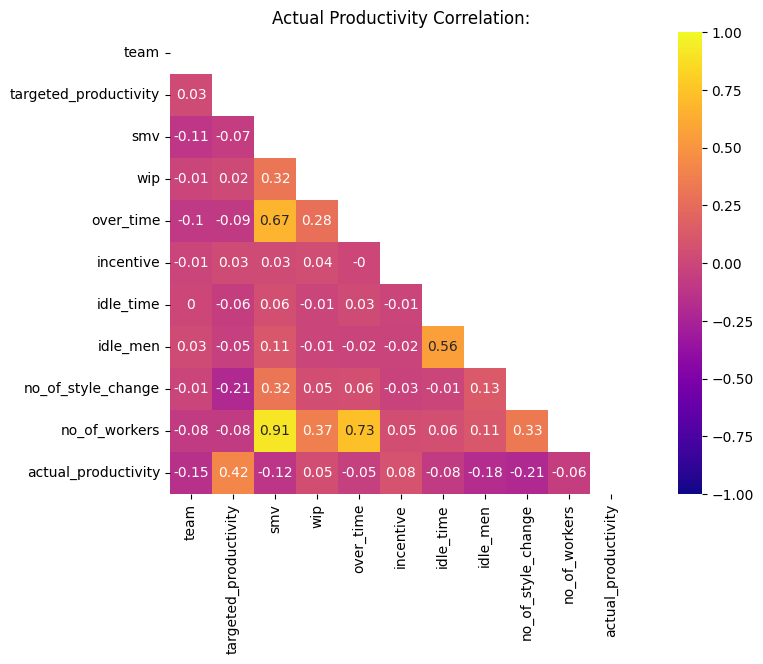

In [5]:
# Create a heatmap
# Establish figure size
plt.figure(figsize=(12,6))

core = df.corr(numeric_only=True).round(2)
mask = np.zeros_like(core)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(core, 
            square = True,
            cmap="plasma",
            annot=True,
            vmax= 1,
            vmin= -1,
            mask=mask,
            )
plt.title('Actual Productivity Correlation:')

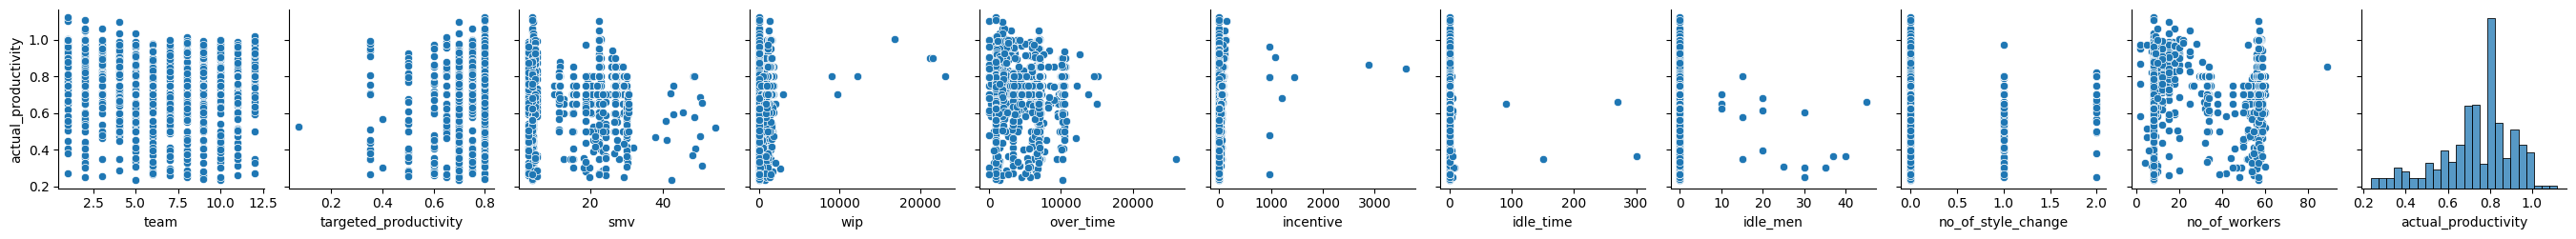

In [6]:
# Using a pairplot, we will see the relationship between the target and the rest ouf our features
sns.pairplot(df, y_vars=['actual_productivity'])




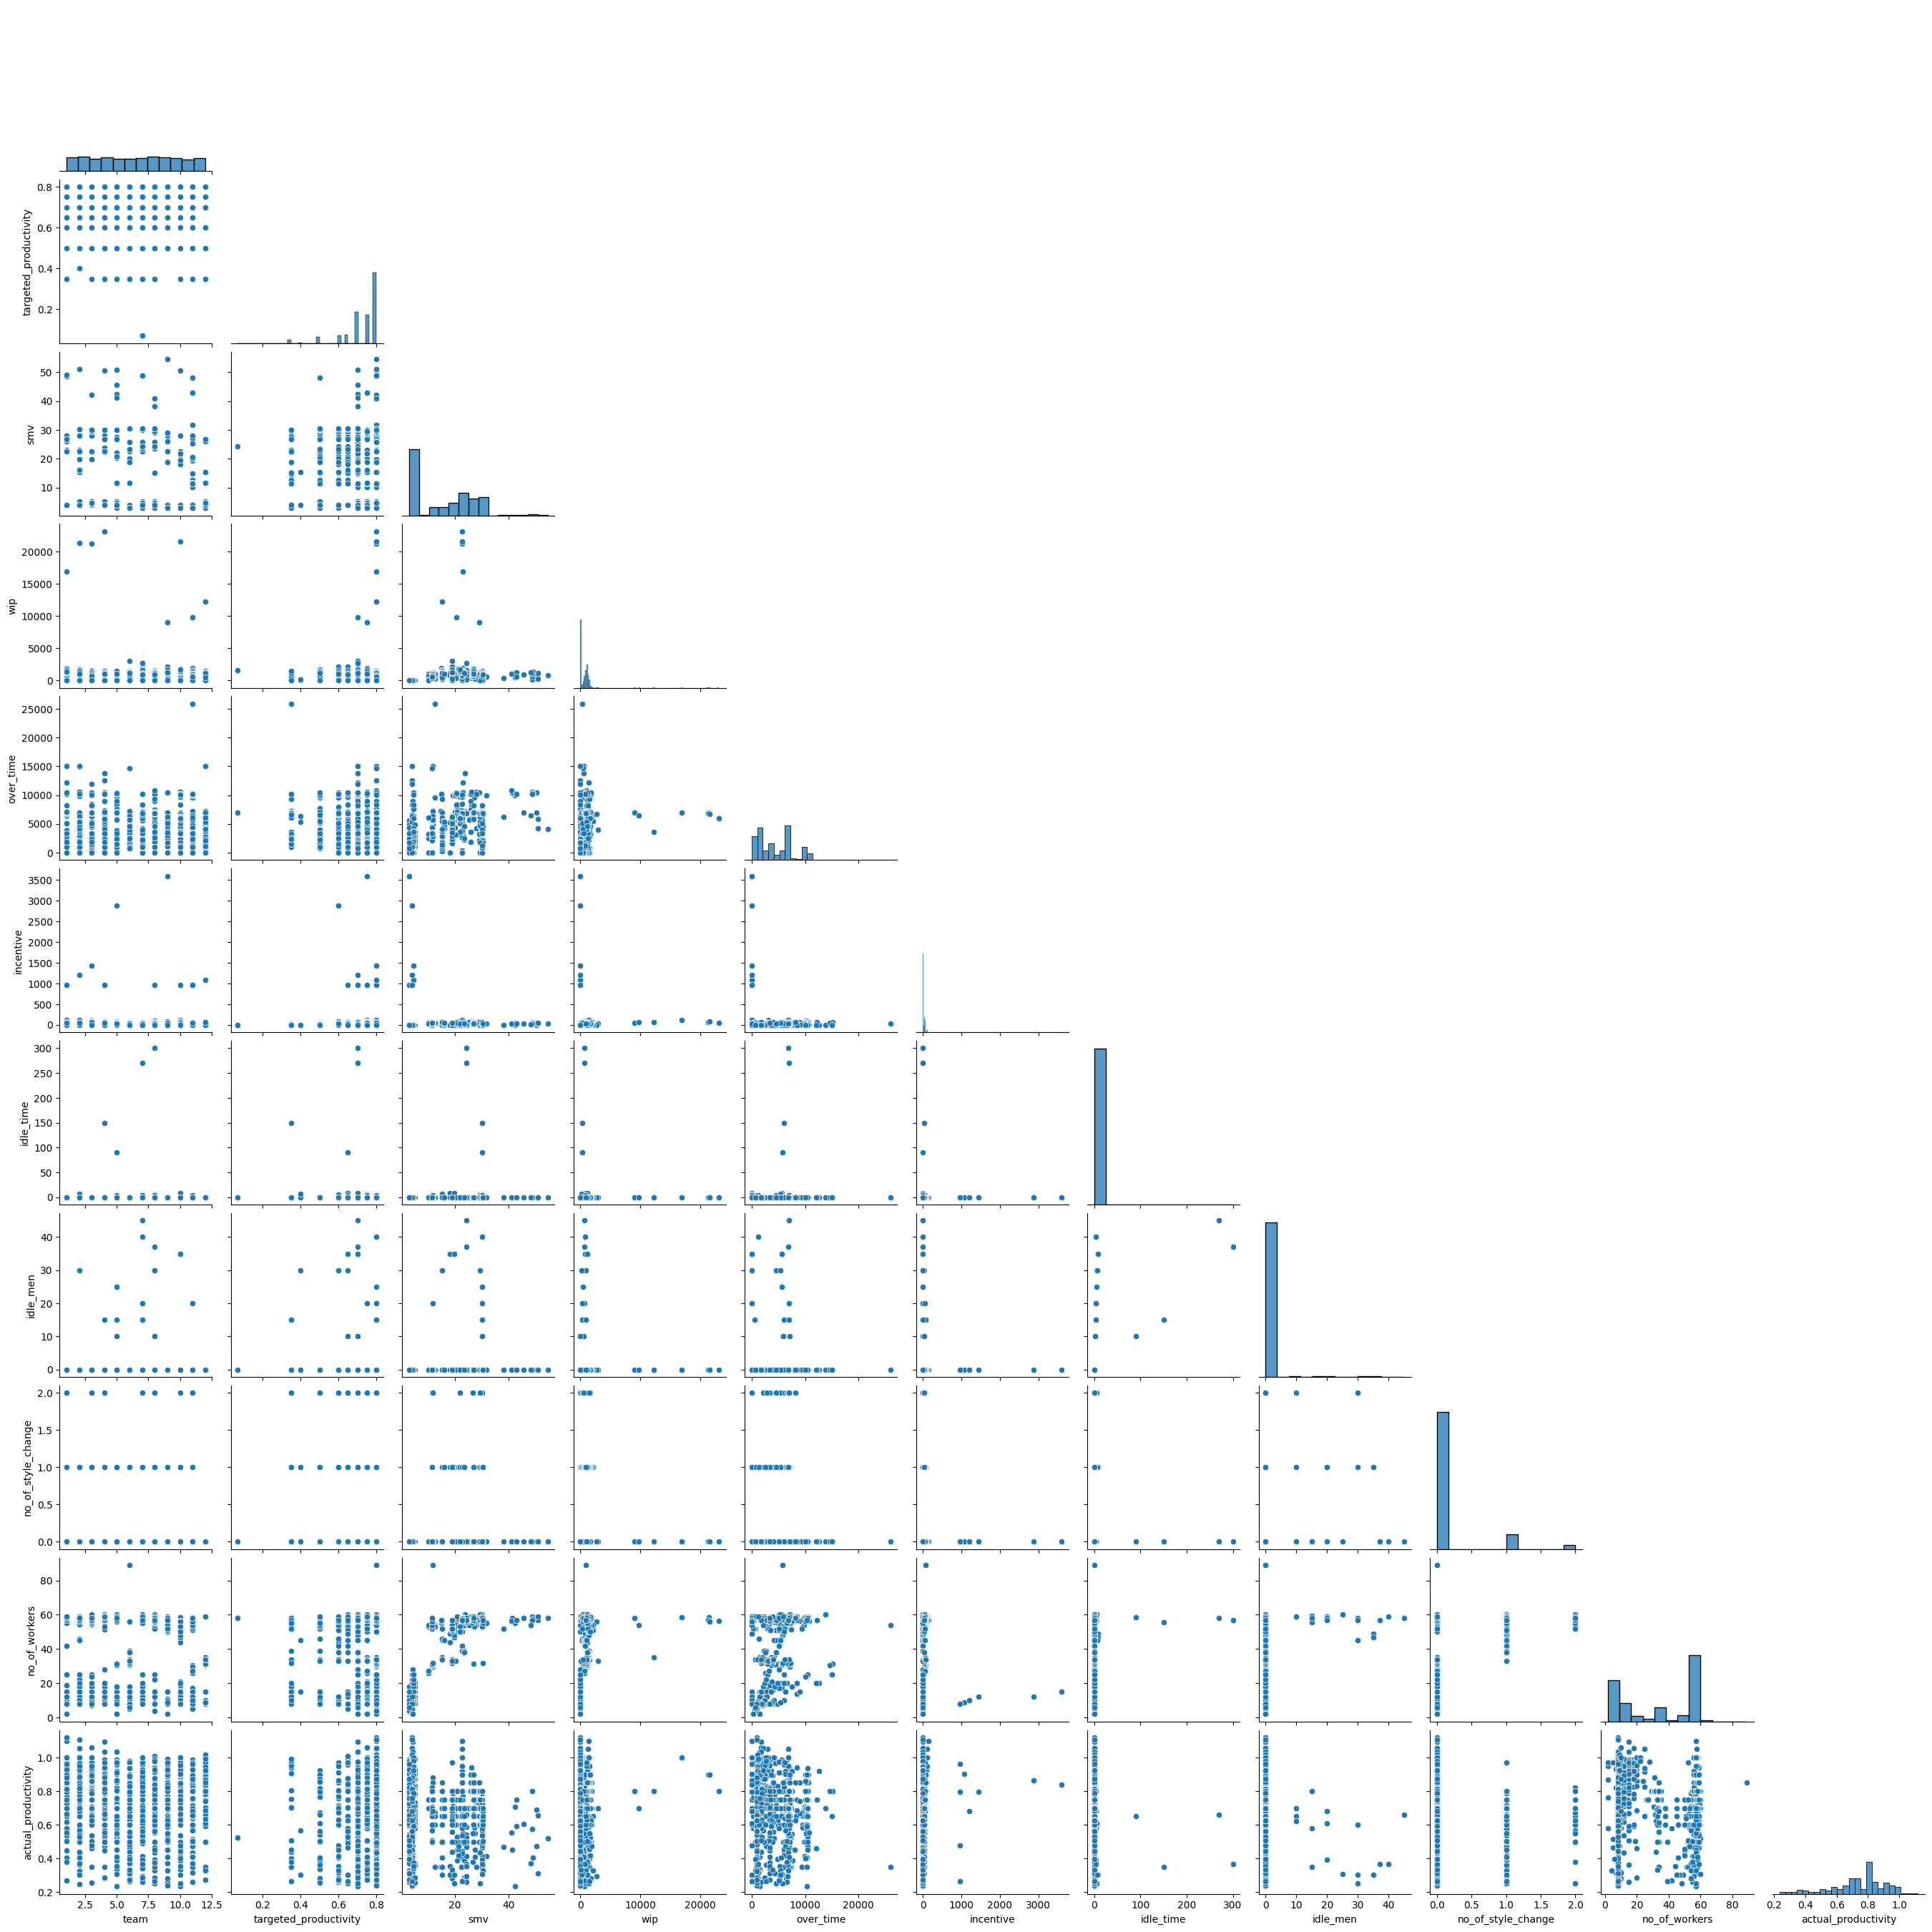

In [26]:
sns.pairplot(df, corner=True)

In [ ]:
# Step 1: Identify the target vector
target = 'actual_productivity'

# Step 2: Separate the target vector from the feature matrix
X = df.drop(columns=target)
y = df[target]

# Step 3: Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=.8, random_state=42)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work:
assert len(x_train) + len(x_test) == len(X), 'You did not separate the data properly'



In [8]:
# Establishing a baseline
baseline = [df.actual_productivity.mean()] * len(df)
baseline

[0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969791145,
 0.7350910969

Our Baseline (mean productivity): 73%
If we guessed a productivity output without machiine learning, 
the baseline would be projected.

In [9]:
# Step 1a: Create the pipeline object
model_lr = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    LinearRegression()
)

# Step 2: Fit the pipeline
model_lr.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [10]:
# Step 1a: Create the pipeline object
pipe_dt = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    DecisionTreeRegressor(random_state=42)
)

# Step 2: Fit the pipeline
pipe_dt.fit(x_train, y_train)



Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [11]:
# Step 1a: Create the pipeline object
model_rf = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    RandomForestRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_rf.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [12]:
# Step 1a: Create the pipeline object
model_xg = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    XGBRFRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_xg.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('xgbrfregressor',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=42,
                                reg_alpha=None, ...))])

Calculating Mean Squared Error (MAE)

In [23]:
print('Decision Tree Scores:')
print(mean_absolute_error(y_train, pipe_dt.predict(x_train)))
print(mean_absolute_error(y_test, pipe_dt.predict(x_test)))

print('\n\tNext Model:\n')

print('Linear Model Score:')
print(mean_absolute_error(y_train, model_lr.predict(x_train)))
print(mean_absolute_error(y_test, model_lr.predict(x_test)))

print('\n\tNext Model:\n')

print('Random Forest Score:')
print(mean_absolute_error(y_train, model_rf.predict(x_train)))
print(mean_absolute_error(y_test, model_rf.predict(x_test)))

print('\n\tNext Model:\n')

print('XGBoost Score:')
print(mean_absolute_error(y_train, model_xg.predict(x_train)))
print(mean_absolute_error(y_test, model_xg.predict(x_test)))

Decision Tree Scores:
0.02071737330331642
0.07624921602423611

	Next Model:

Linear Model Score:
0.10735035487529343
0.1066576936467511

	Next Model:

Random Forest Score:
0.038818565202205946
0.06888115507310723

	Next Model:

XGBoost Score:
0.06830371703627709
0.07611534931778335


Calculating Mean Squared Error (MSE)
Along the same lines as MAE, however, MSE squares the predicted and actual value before subtraction and division, causing errors to be very obvious. MSE can show large numbers due to the amount of variance actually present within the model.

In [22]:
print('Decision Tree Scores:')
print(mean_squared_error(y_train, pipe_dt.predict(x_train)))
print(mean_squared_error(y_test, pipe_dt.predict(x_test)))

print('\n\tNext Model:\n')

print('Linear Model Score:')
print(mean_squared_error(y_train, model_lr.predict(x_train)))
print(mean_squared_error(y_test, model_lr.predict(x_test)))

print('\n\tNext Model:\n')

print('Random Forest Score:')
print(mean_squared_error(y_train, model_rf.predict(x_train)))
print(mean_squared_error(y_test, model_rf.predict(x_test)))

print('\n\tNext Model:\n')

print('XGBoost Score:')
print(mean_squared_error(y_train, model_xg.predict(x_train)))
print(mean_squared_error(y_test, model_xg.predict(x_test)))

Decision Tree Scores:
0.003881186725248533
0.016876139607827707

	Next Model:

Linear Model Score:
0.022052231648912325
0.021383356441485344

	Next Model:

Random Forest Score:
0.00529467725251291
0.011903038094365572

	Next Model:

XGBoost Score:
0.01138132450494598
0.013582526009853399


Calculating R2
Overall assessment of model accuracy. The values range from 0 to 1, indicating a percentage of data that the model is correctly predicting.

In [24]:
print('Decision Tree Scores:')
print(r2_score(y_train, pipe_dt.predict(x_train)))
print(r2_score(y_test, pipe_dt.predict(x_test)))

print('\n\tNext Model:\n')

print('Linear Model Score:')
print(r2_score(y_train, model_lr.predict(x_train)))
print(r2_score(y_test, model_lr.predict(x_test)))

print('\n\tNext Model:\n')

print('Random Forest Score:')
print(r2_score(y_train, model_rf.predict(x_train)))
print(r2_score(y_test, model_rf.predict(x_test)))

print('\n\tNext Model:\n')

print('XGBoost Score:')
print(r2_score(y_train, model_xg.predict(x_train)))
print(r2_score(y_test, model_xg.predict(x_test)))

Decision Tree Scores:
0.8762236671611917
0.3644229023765031

	Next Model:

Linear Model Score:
0.29672428624533964
0.19467532620883776

	Next Model:

Random Forest Score:
0.8311455283463232
0.551716294086015

	Next Model:

XGBoost Score:
0.637034054325106
0.4884646216286259


In [26]:
# Step 1: Create a parameter grid
param_grid = {
    'randomforestregressor__n_estimators': range(50,200, 50), # # of trees in the forrest
    'randomforestregressor__max_depth' : range(10,60, 10), # looks at depth of tree
    'randomforestregressor__min_samples_split' : [2,5,10], # minimum # of samples required to spling an internal node
    
}

# Step 2: Instantiate the RSCV module with the model object and the param_grid object
clf = RandomizedSearchCV(model_rf, param_grid)

# Step 3: Fit the data
clf.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=[],
                                                            use_cat_names=True)),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'randomforestregressor__max_depth': range(10, 60, 10),
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': range(50, 200, 50)})

In [25]:
# Shows the best parameters for the model
clf.best_params_


{'randomforestregressor__n_estimators': 50,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__max_depth': 40}